# Рубежный контроль №1

## Петрова Ирина ИУ5-22М

### Вариант 11

#### Задача №2.

Для заданного набора данных проведите обработку пропусков в данных. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему? Для заданного набора данных произведите масштабирование данных и преобразование категориальных признаков в количественные. Какие методы Вы использовали для решения задачи и почему?

Для студентов групп ИУ5-22М, ИУ5И-22М - для произвольной колонки данных построить гистограмму.

**Набор данных:** https://www.kaggle.com/karangadiya/fifa19

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [6]:
data = pd.read_csv('D:/Загрузки/fifa19/data.csv', sep=",")
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [15]:
# размер набора данных
data.shape

(18207, 89)

In [16]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 18207


## Построение гистограммы

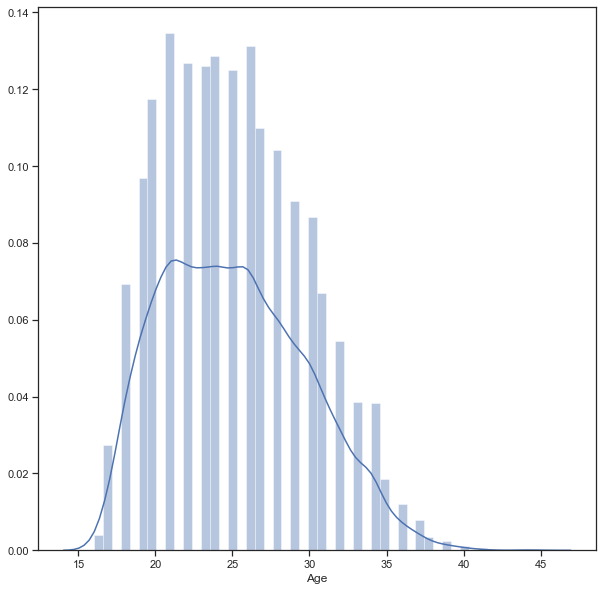

In [4]:
# для колонки Age
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Age'])

## Обработка пропусков в данных

### Простые стратегии - удаление или заполнение нулями

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((18207, 89), (18207, 13))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((18207, 89), (0, 89))

In [13]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### "Внедрение значений" - импьютация (imputation)

#### Обработка пропусков в числовых данных

In [17]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка International Reputation. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Weak Foot. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Skill Moves. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Jersey Number. Тип данных float64. Количество пустых значений 60, 0.33%.
Колонка Crossing. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Finishing. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка HeadingAccuracy. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка ShortPassing. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Volleys. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Dribbling. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Curve. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка FKAccuracy. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка LongPassing. Тип данных float64. Количество 

In [18]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,1.0,2.0,2.0,22.0,34.0,38.0,40.0,49.0,25.0,42.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,1.0,2.0,2.0,21.0,23.0,52.0,52.0,43.0,36.0,39.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,1.0,3.0,2.0,33.0,25.0,40.0,46.0,38.0,38.0,45.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,1.0,3.0,2.0,34.0,44.0,50.0,39.0,42.0,40.0,51.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [24]:
# Фильтр по пустым значениям поля Agility 
data[data['Agility'].isnull()]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
13236,13236,177971,J. McNulty,33,https://cdn.sofifa.org/players/4/19/177971.png,Scotland,https://cdn.sofifa.org/flags/42.png,62,62,Rochdale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,13237,195380,J. Barrera,29,https://cdn.sofifa.org/players/4/19/195380.png,Nicaragua,https://cdn.sofifa.org/flags/86.png,62,62,Boyacá Chicó FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,13238,139317,J. Stead,35,https://cdn.sofifa.org/players/4/19/139317.png,England,https://cdn.sofifa.org/flags/14.png,62,62,Notts County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,13239,240437,A. Semprini,20,https://cdn.sofifa.org/players/4/19/240437.png,Italy,https://cdn.sofifa.org/flags/27.png,62,72,Brescia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,13240,209462,R. Bingham,24,https://cdn.sofifa.org/players/4/19/209462.png,England,https://cdn.sofifa.org/flags/14.png,62,66,Hamilton Academical FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13241,13241,219702,K. Dankowski,21,https://cdn.sofifa.org/players/4/19/219702.png,Poland,https://cdn.sofifa.org/flags/37.png,62,72,Śląsk Wrocław,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13242,13242,225590,I. Colman,23,https://cdn.sofifa.org/players/4/19/225590.png,Argentina,https://cdn.sofifa.org/flags/52.png,62,70,Club Atlético Aldosivi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13243,13243,233782,M. Feeney,19,https://cdn.sofifa.org/players/4/19/233782.png,England,https://cdn.sofifa.org/flags/14.png,62,78,Everton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13244,13244,239158,R. Minor,30,https://cdn.sofifa.org/players/4/19/239158.png,Denmark,https://cdn.sofifa.org/flags/13.png,62,62,Hobro IK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13245,13245,242998,Klauss,21,https://cdn.sofifa.org/players/4/19/242998.png,Brazil,https://cdn.sofifa.org/flags/54.png,62,69,HJK Helsinki,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Agility'].isnull()].index
flt_index

Int64Index([13236, 13237, 13238, 13239, 13240, 13241, 13242, 13243, 13244,
            13245, 13246, 13247, 13248, 13249, 13250, 13251, 13252, 13253,
            13254, 13255, 13256, 13257, 13258, 13259, 13260, 13261, 13262,
            13263, 13264, 13265, 13266, 13267, 13268, 13269, 13270, 13271,
            13272, 13273, 13274, 13275, 13276, 13277, 13278, 13279, 13280,
            13281, 13282, 13283],
           dtype='int64')

In [27]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Agility']

13236   NaN
13237   NaN
13238   NaN
13239   NaN
13240   NaN
13241   NaN
13242   NaN
13243   NaN
13244   NaN
13245   NaN
13246   NaN
13247   NaN
13248   NaN
13249   NaN
13250   NaN
13251   NaN
13252   NaN
13253   NaN
13254   NaN
13255   NaN
13256   NaN
13257   NaN
13258   NaN
13259   NaN
13260   NaN
13261   NaN
13262   NaN
13263   NaN
13264   NaN
13265   NaN
13266   NaN
13267   NaN
13268   NaN
13269   NaN
13270   NaN
13271   NaN
13272   NaN
13273   NaN
13274   NaN
13275   NaN
13276   NaN
13277   NaN
13278   NaN
13279   NaN
13280   NaN
13281   NaN
13282   NaN
13283   NaN
Name: Agility, dtype: float64

In [29]:
data_num_MasVnrArea = data_num[['Agility']]
data_num_MasVnrArea.head()

,Agility
0,91.0
1,87.0
2,96.0
3,60.0
4,79.0


In [30]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [31]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [36]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [37]:
data[['Agility']].describe()

,Agility
count,18159.000000
mean,63.503607
std,14.766049
min,14.000000
25%,55.000000
50%,66.000000
75%,74.000000
max,96.000000


In [38]:
test_num_impute_col(data, 'Agility', strategies[0])

('Agility', 'mean', 48, 63.503607026818656, 63.503607026818656)

In [39]:
test_num_impute_col(data, 'Agility', strategies[1])

('Agility', 'median', 48, 66.0, 66.0)

In [40]:
test_num_impute_col(data, 'Agility', strategies[2])

('Agility', 'most_frequent', 48, 68.0, 68.0)

#### Обработка пропусков в категориальных данных

In [41]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Club. Тип данных object. Количество пустых значений 241, 1.32%.
Колонка Preferred Foot. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Work Rate. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Body Type. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Real Face. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Position. Тип данных object. Количество пустых значений 60, 0.33%.
Колонка Joined. Тип данных object. Количество пустых значений 1553, 8.53%.
Колонка Loaned From. Тип данных object. Количество пустых значений 16943, 93.06%.
Колонка Contract Valid Until. Тип данных object. Количество пустых значений 289, 1.59%.
Колонка Height. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Weight. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка LS. Тип данных object. Количество пустых значений 2085, 11.45%.
Колонка ST. Тип данных object. Количество пустых значений 2085, 11.45%.
Колонка R

In [47]:
cat_temp_data = data[['Height']]
cat_temp_data.head()

,Height
0,5'7
1,6'2
2,5'9
3,6'4
4,5'11


In [48]:
cat_temp_data['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [49]:
cat_temp_data[cat_temp_data['Height'].isnull()].shape

(48, 1)

In [50]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([["5'7"],
       ["6'2"],
       ["5'9"],
       ...,
       ["5'8"],
       ["5'10"],
       ["5'10"]], dtype=object)

In [51]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(["5'1", "5'10", "5'11", "5'2", "5'3", "5'4", "5'5", "5'6", "5'7",
       "5'8", "5'9", "6'0", "6'1", "6'2", "6'3", "6'4", "6'5", "6'6",
       "6'7", "6'8", "6'9"], dtype=object)

In [53]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([["5'7"],
       ["6'2"],
       ["5'9"],
       ...,
       ["5'8"],
       ["5'10"],
       ["5'10"]], dtype=object)

In [54]:
np.unique(data_imp3)

array(['!!!', "5'1", "5'10", "5'11", "5'2", "5'3", "5'4", "5'5", "5'6",
       "5'7", "5'8", "5'9", "6'0", "6'1", "6'2", "6'3", "6'4", "6'5",
       "6'6", "6'7", "6'8", "6'9"], dtype=object)

In [55]:
data_imp3[data_imp3=='!!!'].size

48

**Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали?** -- удаление строк и колонок с пустыми значениями, заполнение всех пропущенных значений нулями, импьютацию для количественных признаков и для категориальных (импьютация наиболее частыми значениями и константой)

**Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?** -- для дальнейшего построения моделей будем использовать категориальные признаки со стратегиями "most_frequent" или "constant" для корректной работы класса SimpleImputer

## Масштабирование данных

###  MinMax масштабирование

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [57]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Age']])

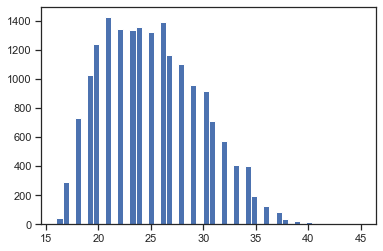

In [58]:
plt.hist(data['Age'], 50)
plt.show()

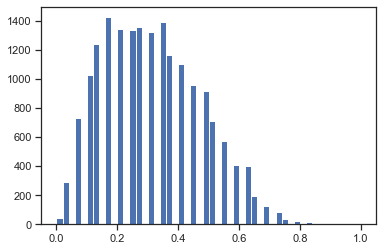

In [59]:
plt.hist(sc1_data, 50)
plt.show()


### Масштабирование данных на основе Z-оценки - StandardScaler

In [60]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Age']])

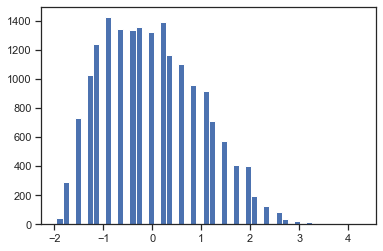

In [61]:
plt.hist(sc2_data, 50)
plt.show()

###  Нормализация данных

In [62]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Age']])

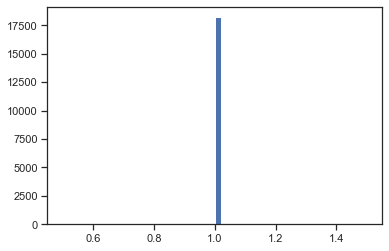

In [63]:
plt.hist(sc3_data, 50)
plt.show()

## Преобразование категориальных признаков в количественные

In [69]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,5'7
1,6'2
2,5'9
3,6'4
4,5'11
...,...
18202,5'9
18203,6'3
18204,5'8
18205,5'10


### Кодирование категорий целочисленными значениями - label encoding

In [70]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [71]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [72]:
cat_enc['c1'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9"], dtype=object)

In [73]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [75]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

array(["5'1", "5'10", "5'11", "5'2", "5'3", "5'4", "5'5", "5'6", "5'7",
       "5'8", "5'9", "6'0", "6'1", "6'2", "6'3", "6'4", "6'5", "6'6",
       "6'7", "6'8", "6'9"], dtype=object)

### Кодирование категорий наборами бинарных значений - one-hot encoding

In [76]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [77]:
cat_enc.shape

(18207, 1)

In [78]:
cat_enc_ohe.shape

(18207, 21)

In [79]:
cat_enc_ohe

<18207x21 sparse matrix of type '<class 'numpy.float64'>'
	with 18207 stored elements in Compressed Sparse Row format>

In [80]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,


In [81]:
cat_enc.head(10)

,c1
0,5'7
1,6'2
2,5'9
3,6'4
4,5'11
5,5'8
6,5'8
7,6'0
8,6'0
9,6'2


### Pandas get_dummies - быстрый вариант one-hot кодирования

In [82]:
pd.get_dummies(cat_enc).head()

,c1_5'1,c1_5'10,c1_5'11,c1_5'2,c1_5'3,c1_5'4,c1_5'5,c1_5'6,c1_5'7,c1_5'8,...,c1_6'0,c1_6'1,c1_6'2,c1_6'3,c1_6'4,c1_6'5,c1_6'6,c1_6'7,c1_6'8,c1_6'9
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Height_5'1,Height_5'10,Height_5'11,Height_5'2,Height_5'3,Height_5'4,Height_5'5,Height_5'6,Height_5'7,Height_5'8,...,Height_6'1,Height_6'2,Height_6'3,Height_6'4,Height_6'5,Height_6'6,Height_6'7,Height_6'8,Height_6'9,Height_nan
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
